# Pasos del TP
*   Explorar los datos
*   Plantear el problema a resolver
*   Preprocesar los datos a un formato adecuado
*   Elegir algoritmos
*   Fittear y validar
*   Decidir el algoritmo final, y testear

# Problemas que se buscan resolver:

Se ha demostrado que cada vez más empresas (especialmente empresas de comercio electrónico) tienen grandes dificultades en la conversión de propects (clientes potencialess) a clientes activos con la primer compra, además sostener a los clientes actuales en la dinámica e interacción en el tiempo con los productos y la empresa suele ser de difícil comprensión, generando pérdidas de facturación por cancelaciones hasta la pérdida del cliente

Las investigaciones se han centrado en el análisis del producto y el ciclo de valor del cliente en la empresa.

Las preguntas que ayudan a entender el problema:
¿Cuál es el rendimiento de los productos en las ventas?
¿Cómo se relacionan los clientes con los productos en el tiempo?
¿Cómo se agrupan los clientes según sus necesidades e intereses?
¿Cómo retenemos a clientes o mejoramos las tasas de conversión a clientes ? 

## OBJETIVO:
Este proyecto tiene como objetivo explorar diferentes herramientas de conversion, retención y rendimientos de clientes en las ventas a traves de metodologías de Machine Learning

Exploraremos y mediremos la efectividad de las siguientes herramientas:
A. Product Analytics.
B. Recomendación de Productos
C. CLV (Ciclo de vida del Valor cliente)
D. Segmentación de clientes.

Las técnicas algorítmicas en ML a utilizar y explorar:
* No supervisados
  * Clustering Knn
* Supervidados
  * Decision Tree, 
  * SVM, ANN, DNN



# INICIALIZACION DE TOOLS

In [111]:
import sys
assert sys.version_info >= (3, 5)
import os

In [2]:
%matplotlib inline

In [ ]:
!pip install seaborn
!pip install kmodes
!pip install nltk
!pip install matplotlib
!pin install pydot

## TOOLS BASICS

In [5]:
import pandas as pd
from pandas import DataFrame
%matplotlib inline
from datetime import datetime, timedelta, date
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from matplotlib import pyplot as plt


import warnings;
warnings.filterwarnings('ignore')



In [5]:
import seaborn as sns

## PRE PROCESAMIENTO

In [169]:
from __future__ import division
from pandas import Series
from sklearn.metrics import classification_report,confusion_matrix
import datetime as dt

In [7]:
import warnings
warnings.filterwarnings('ignore')

## TOOLS DE NLP

In [32]:

# NLP
import re
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [138]:
# ANALITICA DE TEXTO
from wordcloud import WordCloud
from wordcloud import STOPWORDS

## TOOLS ALGORITMO 1

In [8]:
#Statistical LTV
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import calibration_and_holdout_data, summary_data_from_transaction_data

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn import preprocessing

from kmodes.kprototypes import KPrototypes
from pprint import pprint
import numpy as np

In [16]:
import plotly.graph_objects as go

## TOOLS ALGORITMO 2

In [12]:
 
# ML approach to LTV
import tensorflow as tf 
#import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling as tfmodel
import tensorflow_docs.plots

# Ploteo 
import matplotlib
matplotlib.use('TkAgg')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluación
from sklearn.metrics import r2_score
from sklearn.metrics  import mean_absolute_error

In [29]:
# Clustering para clientes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
print(f'TensorFlow Version: {tf.__version__}')
print(f'Keras version: {keras.__version__}')
print('Physical devices:')
tf.config.list_physical_devices()

In [10]:
%load_ext tensorboard

In [12]:
#remove previous fits
!rm -rf ./logs/ 

#set the directory to save fits:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#define the callback:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
#start tensorboard:
%tensorboard --logdir logs/fit

# CARGA DE DATOS

Si estas en Google Colab

In [ ]:
RETAIL_PATH = "https://github.com/hcgalvan/UNSAM-Machine-Learning-on-Economics/raw/main/data/"

In [ ]:
if 'google.colab' in sys.modules:
  def load_datasets_h1(datasets_path=RETAIL_PATH):
    csv_path = os.path.join(datasets_path, "Year_2009-2010_train.csv")
    return pd.read_csv(csv_path, encoding= 'unicode_escape')

  retail_ol_h1 = load_datasets_h1()
  def load_datasets_h2(datasets_path=RETAIL_PATH):
      csv_path = os.path.join(datasets_path, "Year_2010-2011_train.csv")
      return pd.read_csv(csv_path, encoding= 'unicode_escape')

  retail_ol_h1 = load_datasets_h1()
  retail_ol_h2 = load_datasets_h2()

Utilizar si estas en PC con Code y cualquier otro framework

In [17]:
def carga_inicial():
    retail_ol_h1 = pd.read_csv('./data/Year_2009-2010_train.csv',  encoding= 'unicode_escape')
    retail_ol_h2 = pd.read_csv('./data/Year_2010-2011_train.csv',  encoding= 'unicode_escape')
    return [retail_ol_h1, retail_ol_h2]

De Uso comun para PC

In [18]:
def cargar_archivo_total():
    frames = carga_inicial()
    results = pd.concat(frames)
    df = results.copy()
    return df

De Uso en COLAB

In [ ]:
def cargar_archivo_total_COLAB():
    results = pd.concat([retail_ol_h1, retail_ol_h2])
    df = results.copy()
    return df

#### funcion lectura de un solo archivo 2010-2011

In [18]:
def carga_archivo():
    frames = pd.read_csv('./data/Year_2010-2011_train.csv',  encoding= 'unicode_escape')
    df = frames.copy()
    return df

# EXPLORACION INICIAL DE DATOS

#### Situación actual de los datos

In [17]:
# cargar solo un archivo para pruebas
df = carga_archivo()

In [10]:
# cargar los dos archivos utilizados en TP
df = cargar_archivo_total()

In [18]:
df.shape

(433528, 9)

In [19]:
df.isnull().sum()

Unnamed: 0          0
Invoice             0
StockCode           0
Description      1180
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107935
Country             0
dtype: int64

In [20]:
# Chequeamos datos unicos y actuales en cada features (atributos).

for i in df.columns:
  print("Actual number of values",i,len(df[i]))
  print("Unique number of values",i,len(df[i].unique()))

Actual number of values Unnamed: 0 433528
Unique number of values Unnamed: 0 433528
Actual number of values Invoice 433528
Unique number of values Invoice 24673
Actual number of values StockCode 433528
Unique number of values StockCode 4019
Actual number of values Description 433528
Unique number of values Description 4156
Actual number of values Quantity 433528
Unique number of values Quantity 657
Actual number of values InvoiceDate 433528
Unique number of values InvoiceDate 22310
Actual number of values Price 433528
Unique number of values Price 1415
Actual number of values Customer ID 433528
Unique number of values Customer ID 4348
Actual number of values Country 433528
Unique number of values Country 38


In [21]:
# Chequeamos valores nulos en los features
df.isnull().sum()

Unnamed: 0          0
Invoice             0
StockCode           0
Description      1180
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107935
Country             0
dtype: int64

In [22]:
# Chequeamos datos duplicados
df.duplicated().sum()

0

In [23]:
# meses incompletos
print('Rango de Fecha: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape
df.loc[df['InvoiceDate'] < '2009-12-02' ].shape

Rango de Fecha: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


(0, 9)

# PRE-PROCESAMIENTO DATOS

## Preparación de Datos
1. Eliminación de pedidos cancelados.
2. Eliminando registros sin Customer ID, sin descripción de productos y features sin títulos
3. Excluimos meses incompletos.
4. Calcular las ventas totales de los features Cantidad y Precio unitario.
5. Datos por cliente : para analizar segmentos de clientes, necesitamos transformar nuestros datos, de modo que cada registro represente el historial de compras de clientes individuales.

#### 1. Limpieza de Datos

In [21]:
# Hay registros con valores negativos en la columna Cantidad, que representan pedidos cancelados. Ignoremos y eliminemos estos registros.
def limpieza_datos(df):
    # Observamos las cantidades negativas
    df.loc[df['Quantity'] <= 0].shape
    df = df.loc[df['Quantity'] > 0]
    #Quitamos la 1er columna vacía
    df.drop(['Unnamed: 0'], axis =1, inplace=True)
    # Quitamos valores nulos en features Customer ID y la Descripcion porque no son imputaciones.
    df.dropna(inplace=True)
    # Quitamos valores duplicados
    df.drop_duplicates(inplace=True)
    # Quitamos fechas incompletas
    df = df.loc[df['InvoiceDate'] < '2011-12-01']
    df = df.loc[df['InvoiceDate'] > '2009-12-01']
    return df

In [37]:
def limpieza_datos_con_cancel(df):
    # Quitamos valores nulos en features Customer ID y la Descripcion porque no son imputaciones.
    df.dropna(inplace=True)
    # Quitamos valores duplicados
    df.drop_duplicates(inplace=True)
    # Quitamos fechas incompletas
    df = df.loc[df['InvoiceDate'] < '2011-12-01']
    df = df.loc[df['InvoiceDate'] > '2009-12-01']
    return df

#### 2. Agregados de features

##### NLP - PRE-PROCESADO PARA ANALIZAR CATEGORIAS DE PRODUCTOS

In [30]:
# Esta función busca categorizar a los productos que se ofrecen
def agrega_color(df):
    colours = ['red','orange', 'yellow','green', 'blue', 'indigo', 'violet', 'purple', 'pink', 'silver', 'gold', 'beige', 'brown', 'grey', 'gray', 'black', 'white', 'cream']

    stop_words = set(stopwords.words('english'))
    Product_type = []
    Colour_type = []
    dataset= df
    # dataset= len(df)
    for row in dataset.iloc[:,2]:
        s=" "
        description = re.sub('[^a-zA-Z]'," ", str(row).lower()) #cleaning of text data
        wordsList = nltk.word_tokenize(description) #tokenization
        wordsList = [nltk.stem.WordNetLemmatizer().lemmatize(w, 'n') for w in wordsList if not w in stop_words] # lemmitization
        flag=False
        for w in wordsList:
            if w in colours:
                Colour_type.append(w)
                flag=True
            break
        if flag==False:
            Colour_type.append("no_color") #taking out colours from description

        tagged = nltk.pos_tag(wordsList)

        for tag in tagged:
            if tag[1]=='NN' :
                s+=tag[0] +  " "
        Product_type.append(s)
    
    return Product_type, Colour_type

In [22]:
def borrar_desc_invoice(df):
    # Quitar columnas "InvoiceDate" y "Description"
    X = df.drop(["Description", "InvoiceDate"], axis=1)
    return X

In [23]:
def cambiar_tipo_datos(df):
    """
    Transformar todas las variables en categoricas y en flotantes 
    Columna 2 es Quantity, 3 es Price y 8 Revenue
    """
    X = df.astype('category')
    X.iloc[:, 2] = X.iloc[:, 2].astype(float)
    X.iloc[:, 3] = X.iloc[:, 3].astype(float)
    X.iloc[:, 8] = X.iloc[:, 8].astype(float)
    return X

##### FUNCIONES PARA DNN

In [28]:
#  Ingeniería de features
def get_features(data, feature_start, feature_end, target_start, target_end):
    """
    Function that outputs the features and targets on the user-level.
    Inputs:
        * data - a dataframe with raw data
        * feature_start - a string start date of feature period
        * feature_end - a  string end date of feature period
        * target_start - a  string start date of target period
        * target_end - a  string end date of target period
    """
    features_data = data.loc[(data.date >= feature_start) & (data.date <= feature_end), :]
    print(f'Using data from {(pd.to_datetime(feature_end) - pd.to_datetime(feature_start)).days} days')
    print(f'To predict {(pd.to_datetime(target_end) - pd.to_datetime(target_start)).days} days')
    
    # Transacciones/Facturaciones
    total_rev = features_data.groupby('Customer ID')['Revenue'].sum().rename('total_revenue')
    recency = (features_data.groupby('Customer ID')['date'].max() - features_data.groupby('Customer ID')['date'].min()).apply(lambda x: x.days).rename('recency')
    frequency = features_data.groupby('Customer ID')['InvoiceDate'].count().rename('frequency')
    # la "t" es la fecha en mita del año
    t = features_data.groupby('Customer ID')['date'].min().apply(lambda x: (datetime(2011, 6, 11) - x).days).rename('t')
    time_between = (t / frequency).rename('time_between')
    
    avg_basket_value = (total_rev / frequency).rename('avg_basket_value')
    avg_basket_size = (features_data.groupby('Customer ID')['Quantity'].sum() / frequency).rename('avg_basket_Size')
    
    returns = features_data.loc[features_data['Revenue'] < 0, :].groupby('Customer ID')['InvoiceDate'].count().rename('num_returns')
    hour = features_data.groupby('Customer ID')['hour'].median().rename('purchase_hour_med')
    dow = features_data.groupby('Customer ID')['dayofweek'].median().rename('purchase_dow_med')
    weekend =  features_data.groupby('Customer ID')['weekend'].mean().rename('purchase_weekend_prop')
    
    #Datos para entrenamiento
    train_data = pd.DataFrame(index = rfm_train_test.index)
    train_data = train_data.join([total_rev, recency, frequency, t, time_between, avg_basket_value, avg_basket_size, returns, hour, dow, weekend])
    train_data = train_data.fillna(0)
    
    #Target Data
    target_data = data.loc[(data.date >= target_start) & (data.date <= target_end), :]
    target_quant = target_data.groupby(['Customer ID'])['date'].nunique()
    target_rev = target_data.groupby(['Customer ID'])['Revenue'].sum().rename('target_rev')
    # Cambios realizados, joint con target_quant HUG
    train_data = train_data.join(target_rev, target_quant).fillna(0) 
    
    return train_data.iloc[:, :-1], train_data.iloc[:, -1]

In [29]:
#DNN - Red Neuronal Profunda -> Regularizador haciendo con apagado de capas
def build_model():
    
    model = keras.Sequential(layers.ImputLayer(imput_shape=(1,), name='Input'),layers=[
    layers.Dense(256, activation='relu', input_shape=[len(X_train.columns), ]),
    layers.Dropout(rate=0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
    ])


    optimizer = tf.keras.optimizers.Adam(lr=0.001)
   
    model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])
    
    return model
    

In [30]:
# Evaluación de predicción
def evaluate(actual, sales_prediction):
    print(f"Total Ventas Actual: {np.round(actual.sum())}")
    print(f"Total Ventas Predictivo: {np.round(sales_prediction.sum())}")
    print(f"Individual R2 score: {r2_score(actual, sales_prediction)} ")
    print(f"Individual Mean Absolute Error: {mean_absolute_error(actual, sales_prediction)}")
    plt.scatter(sales_prediction, actual)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')      
    plt.show()
    

##### FUNCIONES UTILIZADAS EN GENERAL

In [24]:
# Damos formato de fecha a InvoiceDate para realizar tratamientos posteriores
def tipos_dataset(df):    
    df['InvoiceDate']  = pd.to_datetime(df.InvoiceDate, format = '%Y/%m/%d %H:%M')
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
    df['Price']=df['Price'].astype(str)
    df['Price']=df['Price'].astype(float)
    df['Month'] = pd.DatetimeIndex(pd.to_datetime(df['InvoiceDate'])).month
    return df

In [25]:
# Agregamos features para Analizar diferentes casos
# UTILIZAR UNA VEZ SETEADO LOS TIPOS DE DATOS def tipos_dataset(df)
def agregados_features(df):
    # Agregamos features Sales
    df['Sales'] = df['Quantity'] * df['Price']
    # Datos cliente por pedido
    df['date'] = pd.to_datetime(df.InvoiceDate.dt.date, errors='coerce')
    df['time'] = df.InvoiceDate.dt.time
    df['hour'] = df['time'].apply(lambda x: x.hour)

    df['weekend'] = df['date'].apply(lambda x: x.weekday() in [5, 6])
    df['dayofweek'] = df['date'].apply(lambda x: x.dayofweek)

    df['Product Type'] = agrega_color(df)[0]
    df['Colour_type']= agrega_color(df)[1]

    return df

In [27]:
def agregar_fecha_log2(df):
    #Get revenue column
    df['Revenue'] = df['Quantity'] * df['Price']
    #Datetime transformation
    df['date'] = pd.to_datetime(df.InvoiceDate.dt.date)
    df['time'] = df.InvoiceDate.dt.time
    df['hour'] = df['time'].apply(lambda x: x.hour)
    df['weekend'] = df['date'].apply(lambda x: x.weekday() in [5, 6])
    df['dayofweek'] = df['date'].apply(lambda x: x.dayofweek)
    return df

In [26]:
def agregar_fechas(df):
 #Datetime transformation
    df['InvoiceDate']  = pd.to_datetime(df.InvoiceDate, format = '%Y/%m/%d %H:%M')
    # df['date'] = pd.to_datetime(df.InvoiceDate.dt.date)
    df['Day'] = df['InvoiceDate'].apply(lambda x: x.day)
    df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)
    df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
    df['DayOfWeek'] = df['InvoiceDate'].apply(lambda x: x.dayofweek)
    return df

##### FUNCIONES SOBRE DESPCRIPCION DE CLIENTES

In [38]:
def graficar_cluster(four_cluster_df):
    plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
        c='red'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
        c='orange'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
        c='green'
    )

    plt.title('TotalSales vs. OrderCount Clusters')
    plt.xlabel('Order Count')
    plt.ylabel('Total Sales')

    plt.grid()
    plt.show()


    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
        c='blue'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
        c='red'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
        c='orange'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
        c='green'
    )

    plt.title('AvgOrderValue vs. OrderCount Clusters')
    plt.xlabel('Order Count')
    plt.ylabel('Avg Order Value')

    plt.grid()
    plt.show()


    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
        c='blue'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
        c='red'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
        c='orange'
    )

    plt.scatter(
        four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
        four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
        c='green'
    )

    plt.title('AvgOrderValue vs. TotalSales Clusters')
    plt.xlabel('Total Sales')
    plt.ylabel('Avg Order Value')

    plt.grid()
    plt.show()
    return

##### FUNCIONES SOBRE DESPCRIPCION DE PRODUCTOS

In [35]:
# Ploteo de letras
def ploteo_word(df):
    stopwords=set(STOPWORDS)
    wordcloud=WordCloud(background_color='White').generate(str(df['Description']))
    print(wordcloud)
    plt.rcParams['figure.figsize']=(12,12)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title('Lista de Cantidad veces utilizada una letra descripción productos',fontsize=20,color='red')
    plt.show()
    return

##### FUNCIONES SOBRE PRECIOS

In [36]:
# Ploteo Cantidad y precio
def ploteo_precio_cantidad(df):
    df = df[['Quantity','Price']]
    df['PriceBins'] = pd.cut(df['Price'].tolist(), bins=8)
    sns.barplot(data=df,x="PrecioBins", y="Cantidad")
    return

In [72]:
#Cuántos clientes compraron algo cada mes durante el último año
def precio_cliente_pais(df):
    
    df = df.groupby(['Country' , 'Month']).agg({'Price':'sum' , 'Customer ID' :'count'})
    df.columns = ['PriceSum','CustomerIDCount']
    df = df.reset_index()
    cm = sns.light_palette("blue", as_cmap=True)
    pvd = pd.pivot_table(df, values='CustomerIDCount', index=['Country'],
                    columns=['Month'],
                    aggfunc=np.sum).fillna(0)
    return pvd.style.background_gradient(cmap=cm)

In [73]:
# ¿En qué rangos los precios son más comunes? - Grafica
def rango_precios(df):
    prices = pd.DataFrame([df['Price'].value_counts()
                         .sort_values(ascending=False).to_dict()]).T
    prices = pd.DataFrame(prices['Price'].value_counts())
    prices = prices.reset_index()
    prices.columns = ['Price','CountPrice']
    prices['PriceBins'] = prices.cut(df['Price'].tolist(), bins=8)
    sns.barplot(data=prices, x='PriceBins', y='CountPrice')
    return

In [39]:
# Rango de cambio de precio durante el tiempo - EXPLORACION DE DATOS
def AED(df):
     customer_avg_spending= df[['Price','Customer ID', 'InvoiceDate' , 'Country']]
     avg_selling_of_products = df[['Price','Quantity','InvoiceDate']]
     return customer_avg_spending, avg_selling_of_products 

In [40]:
def customer_avg_spending_insights(df):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m-%d')
    df = df.groupby(['InvoiceDate']).agg({'Price':'sum'}).reset_index()
    df = df.reset_index(drop=True)
    df.columns = ['Date','PriceSum']
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['PriceSum'], name="Price Sum",
                         line_color='deepskyblue'))
    fig.update_layout(title_text='Sum range of all prices among time',
                  xaxis_rangeslider_visible=True)
    fig.show()
    return

In [41]:
# Esta función agrupa por continente a paises y suma la cantidad vendida por pais
def cantidad_mensual_pais(df):
    df = df.groupby(['Country' , 'Month']).agg({'Quantity':'sum'})
    df = df.reset_index()
    df = df.sort_values(by=['Month'])
    Europe = ['United Kingdom','France', 'Belgium','EIRE',
              'Germany','Portugal', 'Denmark', 'Netherlands', 'Poland',
             'Spain', 'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden', 
              'Finland','Italy', 'Switzerland', 'Malta', 'Israel', 
              'Lithuania','Iceland']
    Asia = [ 'Japan','United Arab Emirates','Singapore','Hong Kong',
       'Thailand','West Indies', 'Korea','Lebanon',]
    America = ['Channel Islands','USA','Brazil', 'Canada']
    Australia = ['Australia',]
    df['Continent'] = df['Country'].map(lambda x: 'Europe' if x in Europe else(
                                        'Asia' if x in Asia else
                                        'America' if x in America else
                                        'Australia' if x in Australia else 'None' ))
    fig = px.scatter_geo(df, locations="Country",color="Continent",
                         hover_name="Country", size="Quantity",
                         animation_frame="Month",
                         projection="natural earth")
    fig.show()
    return

In [42]:
def create_prediction(df):
    topic = df['Topic']
    df = df[['InvoiceDate','Price']]
    df.columns = ['ds','y']
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=90)
    forecast = m.predict(future)
    df_cv = cross_validation(m, horizon='90 days')
    df_p = performance_metrics(df_cv)
    fig3 = plot_cross_validation_metric(df_cv, metric='mape')
    return m.plot(forecast) ,  m.plot_components(forecast) , df_p , fig3 


##### FUNCIONES QUE HACEN AGREGACIONES Y MATRICES

In [43]:
def matriz_cliente_item(df):
    # Matriz cliente-item
    # Podemos sumar todas las cantidades compradas para cada artículo, utilizando la función aggfunc.
    customer_item_matrix = df.pivot_table(
        index='Customer ID', 
        columns='StockCode', 
        values='Quantity',
        aggfunc='sum'
    )
    #Convertimos esta matriz y lo codificamos en 0 - 1 a los datos, por lo que el valor de 1 determinando un producto fue comprado por el cliente dado, y el valor 0 determinado por producto que nunca fue comprado por el cliente dado.
    # La función Lambda que estamos usando en este código simplemente codifica todos los elementos cuyos valores son mayores que 0 con 1, y el resto con 0.
    customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
    return customer_item_matrix

In [74]:
# Cantidad de pedidos por cliente
def agrupa_ordenesxcliente(df):
    orders_df = df.groupby(['Customer ID', 'Invoice']).agg({
    'Sales': sum,
    'InvoiceDate': max
    })
    return orders_df

In [78]:
# Ventas por cliente
def agrupa_ventasxcliente(df):
    customer_df = df.groupby('Customer ID').agg({
        'Sales': sum,
        'Invoice': lambda x: x.nunique()
    })

    customer_df.columns = ['TotalSales', 'OrderCount']
    customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']
    return customer_df

In [87]:
# Cantidad de Artículos por Orden/Factura
def agrupa_artxventas(df):
    group_by_invoice=pd.DataFrame(df.groupby('Invoice')['StockCode'].nunique())
    group_by_invoice.columns=['No.of Items per Order']
    group_by_invoice.head()
    return 

# ANÁLISIS: CARACTERIZACIÓN DE DATOS

Necesitamos convertir InvoiceDate en tipo Date.

In [52]:
df.describe(include='object')

,Invoice,StockCode,Description,InvoiceDate,Country
count,433528,433528,432348,433528,433528
unique,24673,4019,4155,22310,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,892,1859,1903,892,396342


### PRE-PROCESAMIENTO PARA CLIENTES

##### A partir de 4-CustomerSegmentation.ipynb

#### Limpieza inicial y agregados

In [13]:
df = limpieza_datos(df)

In [15]:
df = tipos_dataset(df)

In [16]:
df['Sales'] = df['Quantity'] * df['Price']

#### Caracterización de clientes

In [17]:
# Analizamos clientes
df['Customer ID'].describe()

count    613951.000000
mean      15322.031318
std        1695.361076
min       12346.000000
25%       13971.000000
50%       15251.000000
75%       16794.000000
max       18287.000000
Name: Customer ID, dtype: float64

In [95]:
df['Price'].describe()

count    613951.000000
mean          3.203416
std          27.630973
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10468.800000
Name: Price, dtype: float64

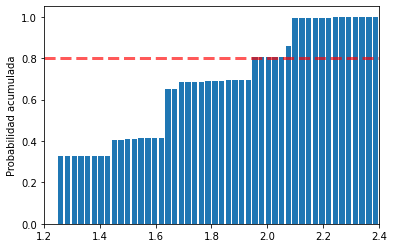

In [99]:
### Visualizacion de los cuantiles
plt.hist(df['Price'], bins = 50, range = [1.2, 2.4], density = True, cumulative = True, rwidth = 0.80)

# Cambiar aqui lo cuantiles que se quieran visualizar
for c in [0.20, 0.80]:

  plt.hlines(y = c, xmin = 1.2, xmax = np.quantile(df['Price'], c), linestyle = '--', color = 'r', alpha = 0.65, linewidth = 3)
  plt.vlines(x = np.quantile(df['Price'], c), ymin = 0.00, ymax = c, linestyles= '--', color = 'r', alpha = 0.65, linewidth = 3)

plt.ylabel('Probabilidad acumulada')
plt.ylim([0.00, 1.05])
plt.xlim([1.2, 2.4])
plt.show()

In [119]:
Precio = df['Price']


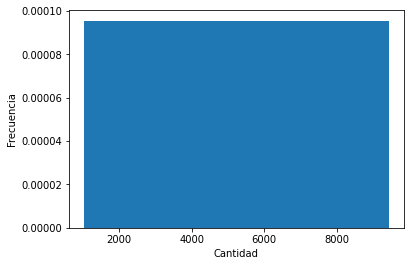

Media: 3.203416
Varianza: 763.471
Desviacion: 27.631
90% central: 0.42 - 8.5
Mediana: 1.95
Moda: [1.25]


In [121]:
# Histograma
ax = Precio.hist(bins = 1, grid = False, rwidth = 0.80, cumulative = False, density = True)
ax.set_xlabel('Cantidad')
ax.set_ylabel('Frecuencia')
plt.show()

# Observables
print('Media: {:3f}'.format(Precio.mean()))
print('Varianza: {:.3f}'.format(Precio.var()))
print('Desviacion: {:.3f}'.format(Precio.std()))
print('90% central: {} - {}'.format(*Precio.quantile([0.05, 0.95])))
print('Mediana: {}'.format(Precio.median()))
print('Moda: {}'.format(Precio.mode().values))

In [18]:
df['Quantity'].describe()

count    613951.000000
mean         13.385628
std         119.300741
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       74215.000000
Name: Quantity, dtype: float64

In [21]:
clientes = agrupa_ventasxcliente(df)

In [22]:
clientes.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5828.000000,5828.000000,5828.000000
mean,2327.814351,6.098147,302.795982
std,11403.148921,12.491479,474.321604
min,0.000000,1.000000,0.000000
25%,276.365000,1.000000,143.100000
50%,684.745000,3.000000,227.097500
75%,1810.440000,7.000000,340.546941
max,460080.010000,379.000000,19633.500000


In [23]:
# Rankeo de clientes
rank_df = clientes.rank(method='first')
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5828.000000,5828.000000,5828.000000
mean,2914.500000,2914.500000,2914.500000
std,1682.543016,1682.543016,1682.543016
min,1.000000,1.000000,1.000000
25%,1457.750000,1457.750000,1457.750000
50%,2914.500000,2914.500000,2914.500000
75%,4371.250000,4371.250000,4371.250000
max,5828.000000,5828.000000,5828.000000


In [24]:
# Ranking de clientes
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,5814.0,5009.0,5824.0
12347.0,5148.0,4361.0,5279.0
12348.0,4285.0,3741.0,4336.0
12349.0,5119.0,3257.0,5663.0
12350.0,1299.0,1.0,3330.0
12351.0,1404.0,2.0,3575.0
12352.0,4784.0,4891.0,3343.0
12353.0,1792.0,1657.0,1930.0
12354.0,3059.0,3.0,5560.0


### Normalización de datos

In [25]:
# Normalizamos el ranking de clientes
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [26]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,1.723284,1.244842,1.729228
12347.0,1.327455,0.859711,1.405313
12348.0,0.814541,0.491221,0.844852
12349.0,1.310219,0.203561,1.633539
12350.0,-0.960154,-1.731605,0.246948
12351.0,-0.897748,-1.731011,0.392561
12352.0,1.111116,1.174710,0.254674
12353.0,-0.667145,-0.747381,-0.585126
12354.0,0.085882,-1.730416,1.572322


In [27]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5828.000000,5828.000000,5.828000e+03
mean,0.000000,0.000000,9.753504e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731605,-1.731605,-1.731605e+00
25%,-0.865803,-0.865803,-8.658025e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865803,0.865803,8.658025e-01
max,1.731605,1.731605,1.731605e+00


### PRE-PROCESAMIENTO PARA CLIENTES A PARTIR DE PRODUCTOS

#### Limpieza inicial y agregados
A partir del Test_OnlineRetail.ipynb en estos momentos el analisis lo realizo directamente desde TP-EcoDat-Part-II-Testonlineretaial.ipynb

In [38]:
# cargar solo un archivo para pruebas
df1 = carga_archivo()


In [39]:
nuevodf = limpieza_datos_con_cancel(df1)

In [40]:
# ¿Cuál es el produto más vendido?
nuevodf.StockCode.mode()

0    85123A
dtype: object

In [41]:
product = nuevodf[nuevodf.StockCode.str.contains("85123A")]
product.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
149,498891,578541,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2011-11-24 15:01:00,2.95,14277.0,France
244,11775,537301,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-06 11:38:00,2.95,15860.0,United Kingdom
252,164820,550701,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-04-20 10:48:00,2.55,14905.0,United Kingdom
889,188729,553058,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10,2011-05-13 10:44:00,2.95,17790.0,United Kingdom
1144,109610,545655,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-03-04 13:58:00,2.95,14670.0,United Kingdom


In [42]:
nuevodf.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [43]:
# ¿Cuántos clientes tienen compras para más de un (1) país?
customer= df1.groupby("Customer ID")["Country"].count()>1
customer.count()

4347

In [48]:

# ¿Qué países tienen el mayor y menor número de cancelaciones?
cancelled_orders = df1[df1.Invoice.str.contains("C")]
cancelled_orders.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
12,69987,C541994,22111,SCOTTIE DOG HOT WATER BOTTLE,-24,2011-01-25 09:49:00,4.25,14113.0,United Kingdom
22,404825,C571695,23002,TRAVEL CARD WALLET SKULLS,-24,2011-10-18 14:46:00,0.42,14776.0,United Kingdom
112,290354,C562375,23171,REGENCY TEA PLATE GREEN,-48,2011-08-04 14:46:00,1.45,14911.0,EIRE
137,406405,C571750,M,Manual,-1,2011-10-19 11:16:00,2118.74,12744.0,Singapore
362,302497,C563433,84629,WHITE 3 FRAME BIRDS AND TREE,-1,2011-08-16 12:14:00,4.95,16033.0,United Kingdom


In [49]:
cancelled_orders.Country.mode()

0    United Kingdom
dtype: object

In [52]:
cancelled_orders.Country.min()

'Australia'

In [51]:
# ¿En qué momento se realizan más compras?
data = nuevodf.InvoiceDate.str.split(expand = True)
data.columns = ['Date', 'Time']
data

,Date,Time
1,2011-09-16,12:22:00
3,2011-11-13,15:19:00
4,2011-11-23,15:44:00
6,2011-11-02,14:13:00
7,2010-12-06,12:23:00
...,...,...
433521,2011-08-08,13:53:00
433522,2011-06-09,16:33:00
433523,2011-11-14,15:27:00
433524,2011-07-10,13:46:00


In [54]:
nuevodf.duplicated().sum()

0

In [36]:
# En promedio, ¿cuántos artículos se compran por factura?
avg = df1.groupby('Invoice')['Quantity'].sum().reset_index()
avg.head()

,Invoice,Quantity
0,536365,32
1,536366,6
2,536367,74
3,536368,15
4,536369,3


### PRE-PROCESAMIENTO PARA Segmentación de clientes

#### Clusterizacion con kmeans

In [30]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [31]:
kmeans

KMeans(n_clusters=4)

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 0])

In [33]:
# Centros de cada grupo
kmeans.cluster_centers_

array([[ 1.23280342,  1.04370013,  0.91126752],
       [ 0.28708519,  0.68145021, -0.56666573],
       [-0.19193006, -0.8047821 ,  0.82600314],
       [-1.21411222, -0.86185907, -1.04743004]])

In [34]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [35]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12346.0,1.723284,1.244842,1.729228,0
12347.0,1.327455,0.859711,1.405313,0
12348.0,0.814541,0.491221,0.844852,0
12349.0,1.310219,0.203561,1.633539,0
12350.0,-0.960154,-1.731605,0.246948,2


In [36]:

four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1482
1    1371
2    1354
3    1621
Name: TotalSales, dtype: int64

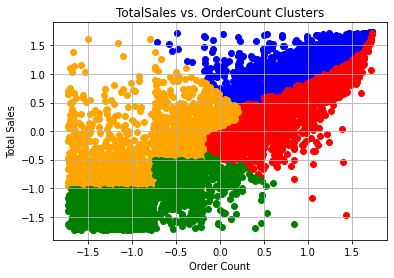

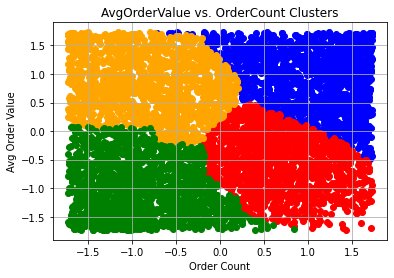

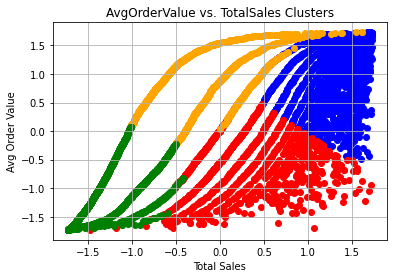

In [39]:
graficar_cluster(four_cluster_df)

#### Seleccionar el mejor numero de cluster

In [55]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    silhouette_coefficients.append(silhouette_avg)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.4373
Silhouette Score for 3 Clusters: 0.4131
Silhouette Score for 4 Clusters: 0.4193
Silhouette Score for 5 Clusters: 0.3822
Silhouette Score for 6 Clusters: 0.3856
Silhouette Score for 7 Clusters: 0.3690


Text(0, 0.5, 'Promedio coeficientes de Silhouette')

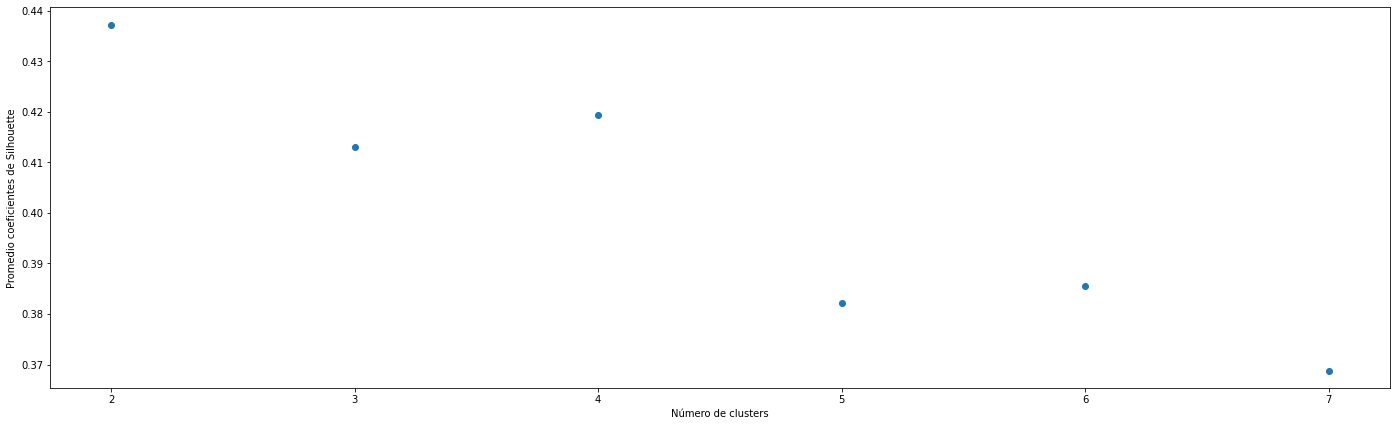

In [44]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 8), silhouette_coefficients)            
ax.set_xticks(range(2, 8))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

In [46]:
import numpy as np

#### Interpretación de la segmentación de clientes

In [67]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [68]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [69]:
kklabels = kmeans.labels_
kkklabels = kklabels.copy()

np.random.shuffle(kkklabels)

silhouette_score(four_cluster_df , kkklabels)

-0.0093893078161236

In [93]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12346.0,1.726586,-1.731444,1.731444,1
12347.0,1.466687,1.069147,1.411631,3
12348.0,0.980895,0.593881,0.933935,3
12349.0,0.895881,-1.730634,1.675578,1
12350.0,-0.816535,-1.729824,0.165574,1
12352.0,1.279657,1.322569,0.473242,3
12353.0,-1.652907,-1.729015,-1.610805,0
12354.0,0.367987,-1.728205,1.554130,1
12355.0,-0.207676,-1.727395,1.185737,1


In [94]:
kmeans.cluster_centers_

array([[-1.20540557, -0.78202013, -1.01493887],
       [-0.07409861, -0.84120274,  0.85973435],
       [ 0.26621004,  0.74846031, -0.58785346],
       [ 1.2254555 ,  1.02162189,  0.89570949]])

In [95]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 3]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12347.0,1.466687,1.069147,1.411631,3
12348.0,0.980895,0.593881,0.933935,3
12352.0,1.279657,1.322569,0.473242,3
12359.0,1.555749,0.594690,1.655336,3
12360.0,1.274799,0.173671,1.561416,3


In [97]:
clientes.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1074.000000,1074.000000,1074.000000
mean,4704.944237,8.554935,518.838680
std,12818.202137,10.548042,809.410428
min,836.150000,1.000000,174.581154
25%,1485.520000,4.000000,293.160833
50%,2224.120000,6.000000,363.701667
75%,3714.330000,10.000000,508.214583
max,212802.060000,189.000000,19633.500000


In [98]:
pd.DataFrame(
    df.loc[
        df['Customer ID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,898
WHITE HANGING HEART T-LIGHT HOLDER,839
REGENCY CAKESTAND 3 TIER,831
LUNCH BAG RED RETROSPOT,750
PARTY BUNTING,692


### Análisis Agrupados

In [122]:
# ¿Cual es la facturación por cliente?
vtaxcliente = agrupa_ventasxcliente(df)
vtaxcliente

#Caracterización de estos datos
vtaxcliente.describe()

,TotalSales,OrderCount,AvgOrderValue
count,5828.000000,5828.000000,5828.000000
mean,2327.814351,6.098147,302.795982
std,11403.148921,12.491479,474.321604
min,0.000000,1.000000,0.000000
25%,276.365000,1.000000,143.100000
50%,684.745000,3.000000,227.097500
75%,1810.440000,7.000000,340.546941
max,460080.010000,379.000000,19633.500000


In [123]:
#¿Cuántas Ordenes/Facturas se realizaron por cliente?
ordenes = agrupa_ordenesxcliente(df)
ordenes

# Caracterización de estos datos
ordenes.describe()

,Sales
count,35540.000000
mean,381.724874
std,904.865689
min,0.000000
25%,127.815000
50%,239.870000
75%,389.222500
max,77183.600000


In [126]:
# ¿Cuántos artículos se incluyen en cada Orden/Factura?
artxcliente = agrupa_artxventas(df)




In [127]:
artxcliente.columns()

AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
# Caracterización de estos datos
artxcliente.describe()

In [ ]:
# ¿Cuál es la media por artículos por cada cliente?

# Caracterización de estos datos

### Análisis de Precios y Cantidades

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613951 entries, 0 to 433525
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      613951 non-null  object        
 1   StockCode    613951 non-null  object        
 2   Description  613951 non-null  object        
 3   Quantity     613951 non-null  int64         
 4   InvoiceDate  613951 non-null  datetime64[ns]
 5   Price        613951 non-null  float64       
 6   Customer ID  613951 non-null  float64       
 7   Country      613951 non-null  object        
 8   Month        613951 non-null  int64         
 9   Sales        613951 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 51.5+ MB


In [129]:
df1 = tipos_dataset(df)

# ALGORITMOS ANALIZADOS

## ALGORITMO 1 - CLASIFICACION Y PREDICCIÓN DE CANTIDAD (RandomForestClassifier, KNN, SVC with kernel, AdaBoost, logistic, Naive base Classifier, Decision Tree Classifier, GradientBoostingClassifier )

In [19]:
df = cargar_archivo_total_COLAB()

In [28]:
# Limpiar datos y establecer tipos
df = limpieza_datos(df)

In [33]:
# Agregar columnas en Dataframe
df['Product Type'] = agrega_color(df)[0]

df['Colour_type'] = agrega_color(df)[1]



In [34]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Product Type,Colour_type
0,533533,20974,12 PENCILS SMALL TUBE SKULL,24,2010-11-17 15:24:00,0.65,18172.0,United Kingdom,pencil tube skull,no_color
2,522458,21823,PAINTED METAL HEART WITH HOLLY BELL,1,2010-09-14 15:55:00,1.45,12933.0,United Kingdom,heart,no_color
3,534035,82599,FANNY'S REST STOPMETAL SIGN,9,2010-11-19 15:50:00,2.10,13124.0,United Kingdom,rest stopmetal sign,no_color
4,519029,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-08-13 10:15:00,0.42,15203.0,United Kingdom,font birthday card,no_color
5,504850,21927,BLUE/CREAM STRIPE CUSHION COVER,40,2010-04-18 10:13:00,1.06,14134.0,United Kingdom,cream stripe cushion cover,blue
...,...,...,...,...,...,...,...,...,...,...
433521,562688,22210,WOOD STAMP SET BEST WISHES,4,2011-08-08 13:53:00,0.83,13869.0,United Kingdom,wood stamp wish,no_color
433522,556248,22916,HERB MARKER THYME,12,2011-06-09 16:33:00,0.65,15681.0,United Kingdom,herb marker thyme,no_color
433523,576339,90166,PINK & WHITE ROSEBUD RING,1,2011-11-14 15:27:00,4.15,14096.0,United Kingdom,rosebud ring,pink
433524,559543,20727,LUNCH BAG BLACK SKULL.,1,2011-07-10 13:46:00,1.65,17126.0,United Kingdom,lunch bag skull,no_color


#### Cargar archivo df LEVANTAR EN GOOGLE COLAB

In [ ]:
RETAIL_PATH = "https://github.com/hcgalvan/UNSAM-Machine-Learning-on-Economics/raw/main/data/"
if 'google.colab' in sys.modules:
  def load_datasets_df(datasets_path=RETAIL_PATH):
    csv_path = os.path.join(datasets_path, "df.csv")
    return pd.read_csv(csv_path, encoding= 'unicode_escape')

In [ ]:
df = load_datasets_df()

In [35]:
# Borrar Descripcion e Invoice Date
df1 = borrar_desc_invoice(df)

# Agregar Ingresos por Ventas
df1['Revenue'] = df1['Price'] * df1['Quantity']

In [37]:
df1.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue
0,533533,20974,24,0.65,18172.0,United Kingdom,pencil tube skull,no_color,15.60
2,522458,21823,1,1.45,12933.0,United Kingdom,heart,no_color,1.45
3,534035,82599,9,2.10,13124.0,United Kingdom,rest stopmetal sign,no_color,18.90
4,519029,21506,12,0.42,15203.0,United Kingdom,font birthday card,no_color,5.04
5,504850,21927,40,1.06,14134.0,United Kingdom,cream stripe cushion cover,blue,42.40


In [38]:
# Codificación de Label para features categoricos
# LabelEncoderes es una clase de utilidad para ayudar a normalizar etiquetas 
# de modo que solo contengan valores entre 0 y n_classes-1
label_encoder = preprocessing.LabelEncoder()

for col in ["Invoice", "StockCode", "Customer ID","Country", "Product Type","Colour_type"]:
  df1[col] = label_encoder.fit_transform(df1[col])

In [43]:
df1.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue
0,16914,411,24,0.65,5713,38,2716,8,15.60
2,12403,1101,1,1.45,573,38,1770,8,1.45
3,17114,3358,9,2.10,759,38,3128,8,18.90
4,11023,842,12,0.42,2803,38,1467,8,5.04
5,5620,1181,40,1.06,1746,38,926,2,42.40


In [44]:
# Definir los tipos de datos en categoricos y Float
df1 = cambiar_tipo_datos(df1)

# Splitear en dataframe en "Train" y "test"
train, test = train_test_split(df1, train_size = 0.8, random_state = 0)

#### Cluster de items similares para el nuevo feature cluster, utiliza en este caso K-prototype clustering

In [ ]:
# Chequeo del valor optimo de 'K' // demanda varios minutos de ejecucion para encontrar el optimo
# Luego de 2067 minutos me arroja un error, ""
# "ValueError: Clustering algorithm could not initialize. Consider assigning the initial clusters manually."
# Las lecturas en https://github.com/nicodv/kmodes/blob/master/README.rst#faq me indica que es una caracteristica 
# donde no tiene sentido
# a.Ejecutar con menos clústeres, ya que es posible que los datos no admitan una gran cantidad de clústeres.
# b.Explore y visualice sus datos, verificando distribuciones extrañas, valores atípicos, etc.
# c.Limpiar y normalizar los datos
# d.Aumentar la proporción de filas a columnas. 

#cost = []
#for num_clusters in list(range(1,15)):
#    kproto = KPrototypes(n_clusters = num_clusters, init='Cao')
#    kproto.fit_predict(train, categorical=[0, 1, 4, 5, 6, 7])
#    cost.append(kproto.cost_)
#    labels=kproto.labels_
#plt.plot(cost)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 8071, ncost: 17505650508.31541
Run: 1, iteration: 2/10, moves: 4684, ncost: 17210350444.41435
Run: 1, iteration: 3/10, moves: 1989, ncost: 16956641328.500473
Run: 1, iteration: 4/10, moves: 899, ncost: 16754617937.95612
Run: 1, iteration: 5/10, moves: 445, ncost: 16589317888.368109
Run: 1, iteration: 6/10, moves: 233, ncost: 16478337261.468472
Run: 1, iteration: 7/10, moves: 142, ncost: 16374704620.687939
Run: 1, iteration: 8/10, moves: 104, ncost: 16254461891.132566
Run: 1, iteration: 9/10, moves: 57, ncost: 16168692698.56108
Run: 1, iteration: 10/10, moves: 39, ncost: 16103166257.947567
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 12972, ncost: 14913201912.484434
Run: 1, iteration: 2/10, moves: 3933, ncost: 14596328014.972965
Run: 1, iteration: 3/10, moves: 2679, ncost: 13691776297.207705
Run: 1, iteration: 

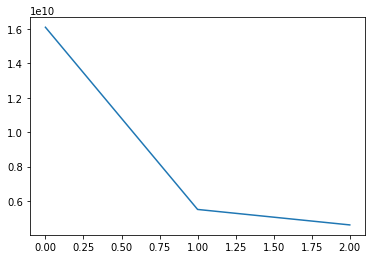

In [156]:
# a partir de la lectura https://medium.com/@shailja.nitp2013/k-modesclustering-ef6d9ef06449
# k-modes se utiliza para agrupar variables categóricas. Define agrupaciones en función del número de categorías coincidentes entre puntos de datos.
# (Esto contrasta con el algoritmo k-medias más conocido, que agrupa datos numéricos basados ​​en la distancia euclidiana). 
# El algoritmo k-prototipos combina k-modos y k-medias y es capaz de agrupar datos numéricos / categóricos mixtos.
cost = []
for num_clusters in list(range(2,5)): # 2, 3 y 4
    kproto = KPrototypes(n_clusters = num_clusters, max_iter=23, init='Cao', n_init=1, verbose=1)
    kproto.fit_predict(train, categorical=[0, 1, 4, 5, 6, 7])
    cost.append(kproto.cost_)
    labels=kproto.labels_
plt.plot(cost)

In [ ]:
#cost = []
#for num_clusters in list(range(1,5)):
#    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
#    kmode.fit_predict(df)
#    cost.append(kmode.cost_)
#    y = np.array([i for i in range(1,5,1)])
#plt.plot(y,cost)

In [159]:
# Genera un nuevo numero de cluster del atributo
# , max_iter=10, init='Cao', n_init=1, verbose=1
kproto = KPrototypes(n_clusters = 3, init = 'Cao', n_init=1, verbose=1)
kproto.fit_predict(train, categorical=[0, 1, 4, 5, 6])
print(kproto.cost_)
labels=kproto.labels_

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 51511, ncost: 17295863407.26355
Run: 1, iteration: 2/100, moves: 9391, ncost: 16687674774.338476
Run: 1, iteration: 3/100, moves: 8757, ncost: 16186807727.060913
Run: 1, iteration: 4/100, moves: 7223, ncost: 15787334064.807274
Run: 1, iteration: 5/100, moves: 4687, ncost: 15441306730.880869
Run: 1, iteration: 6/100, moves: 2461, ncost: 15166415385.870003
Run: 1, iteration: 7/100, moves: 2373, ncost: 14895975013.347692
Run: 1, iteration: 8/100, moves: 2342, ncost: 14533650448.476917
Run: 1, iteration: 9/100, moves: 1349, ncost: 13725939152.521276
Run: 1, iteration: 10/100, moves: 937, ncost: 12011758324.775763
Run: 1, iteration: 11/100, moves: 679, ncost: 7378659006.490408
Run: 1, iteration: 12/100, moves: 4

In [160]:
# Agrego nuevo atributo
train["Cluster number"]=labels


In [161]:
# Ahora agrego "InvoiceDate" en dataframe

df2 = train.merge(pd.DataFrame(df["InvoiceDate"]), left_index=True, right_index=True)


#### Ingeniería de feature

In [165]:
df2

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue,Cluster number,InvoiceDate
0,16914,411,24.0,0.65,5713,38,2716,8,15.60,2,2010-11-17 15:24:00
1,30127,1561,3.0,2.10,4632,38,3813,8,6.30,2,2011-09-16 12:22:00
2,12403,1101,1.0,1.45,573,38,1770,8,1.45,2,2010-09-14 15:55:00
3,17114,3358,9.0,2.10,759,38,3128,8,18.90,2,2010-11-19 15:50:00
3,17114,3358,9.0,2.10,759,38,3128,8,18.90,2,2011-11-13 15:19:00
...,...,...,...,...,...,...,...,...,...,...,...
433520,19900,1368,2.0,8.50,421,27,1951,8,17.00,2,2011-01-17 10:37:00
433521,28357,1405,4.0,0.83,1485,38,4113,8,3.32,2,2011-08-08 13:53:00
433523,34047,4473,1.0,4.15,1710,38,3268,10,4.15,2,2011-11-14 15:27:00
433524,27089,247,1.0,1.65,4690,38,2211,8,1.65,2,2011-07-10 13:46:00


In [179]:
# Agrego las fechas en diferentes rangos: horas, dias, meses, años
df2 = agregar_fechas( df2 )

In [180]:
df2

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue,Cluster number,InvoiceDate,Day,Month,Year,DayOfWeek
0,16914,411,24.0,0.65,5713,38,2716,8,15.60,2,2010-11-17 15:24:00,17,11,2010,2
1,30127,1561,3.0,2.10,4632,38,3813,8,6.30,2,2011-09-16 12:22:00,16,9,2011,4
2,12403,1101,1.0,1.45,573,38,1770,8,1.45,2,2010-09-14 15:55:00,14,9,2010,1
3,17114,3358,9.0,2.10,759,38,3128,8,18.90,2,2010-11-19 15:50:00,19,11,2010,4
3,17114,3358,9.0,2.10,759,38,3128,8,18.90,2,2011-11-13 15:19:00,13,11,2011,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433520,19900,1368,2.0,8.50,421,27,1951,8,17.00,2,2011-01-17 10:37:00,17,1,2011,0
433521,28357,1405,4.0,0.83,1485,38,4113,8,3.32,2,2011-08-08 13:53:00,8,8,2011,0
433523,34047,4473,1.0,4.15,1710,38,3268,10,4.15,2,2011-11-14 15:27:00,14,11,2011,0
433524,27089,247,1.0,1.65,4690,38,2211,8,1.65,2,2011-07-10 13:46:00,10,7,2011,6


##### GUARDAR Y LUEGO LEVANTAR EN PC

In [ ]:
# Guardo el proceso en archivo csv
df2.to_csv('./data/df2.csv')

In [ ]:
# SI FUNCIONA PARA DESCARGAR Y LUEGO LO LEVANTO  PARA TRABAJAR CON GOOGLECOLAB
from google.colab import files
df2.to_csv('df2.csv') 
files.download('df2.csv')

In [6]:
# Capturo el archivo, quito columna vacía y muestro
df2 = pd.read_csv('./data/df2.csv')
df2.drop(['Unnamed: 0'], axis =1, inplace=True)
df2.drop(['InvoiceDate'], axis=1, inplace=True)
df2.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue,Cluster number,Day,Month,Year,DayOfWeek
0,16914,411,24.0,0.65,5713,38,2716,8,15.60,2,17,11,2010,2
1,30127,1561,3.0,2.10,4632,38,3813,8,6.30,2,16,9,2011,4
2,12403,1101,1.0,1.45,573,38,1770,8,1.45,2,14,9,2010,1
3,17114,3358,9.0,2.10,759,38,3128,8,18.90,2,19,11,2010,4
4,17114,3358,9.0,2.10,759,38,3128,8,18.90,2,13,11,2011,6


##### LEVANTAR EN GOOGLE COLAB

In [ ]:
RETAIL_PATH = "https://github.com/hcgalvan/UNSAM-Machine-Learning-on-Economics/raw/main/data/"
if 'google.colab' in sys.modules:
  def load_datasets_df2(datasets_path=RETAIL_PATH):
    csv_path = os.path.join(datasets_path, "df2.csv")
    return pd.read_csv(csv_path, encoding= 'unicode_escape')

In [ ]:
df2 = load_datasets_df2()
df2.drop(['Unnamed: 0'], axis =1, inplace=True)
df2.drop(['InvoiceDate'], axis=1, inplace=True)
df2.head()

### Classification of test data into number of clusters

- Cluster numbers were treated as a target variable as the objective
was to match the records from the validation and testing sets with the clusters from the training set.
- El numero de Clusters fueron tratados como variable target, con el objetivo de converger los registros del set de validación y testeo con el cluster del set de entrenamiento.

In [9]:
# Corte del dataframe entre entrenamiento y validación
train_, val_= train_test_split(df2, train_size = 0.8, random_state = 0)

In [10]:
train_y=train_["Cluster number"]
train_x=train_.drop(['Cluster number'],axis=1,inplace=False)

val_y=val_["Cluster number"]
val_x=val_.drop(['Cluster number'],axis=1,inplace=False)

#### Para Clasificar
* Utilizamos SVC, que brinda el mejor resultado sobre otros algoritmos

In [11]:
model1 = LinearSVC(verbose=True)
model1.fit(train_x, train_y)

[LibLinear]

LinearSVC(verbose=True)

#### Graficador

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(train_.val_x), np.max(train_.val_x), 50)
y = np.linspace(np.min(train_.val_y), np.max(train_.val_y), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = model1.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(train_x.val_x, train_x.val_y, c=train_y, alpha = 1)

# Vectores soporte
ax.scatter(
    model1.support_vectors_[:, 0],
    model1.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    model1.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

#### Procesos

In [12]:
# Validación del data test
pred_y = model1.predict(val_x)

In [13]:
# Evaluación de Performance
accuracy_score(val_y,pred_y)

0.99997615257582

In [46]:
# Adding "InvoiceDate" in test data

test_Df = test.merge(pd.DataFrame(df["InvoiceDate"]), left_index=True, right_index=True)
test_Df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue,InvoiceDate
3,33942,1321,1.0,9.95,3008,38,307,8,9.95,2010-11-19 15:50:00
3,33942,1321,1.0,9.95,3008,38,307,8,9.95,2011-11-13 15:19:00
6,10524,4195,6.0,4.95,1185,38,3773,8,29.70,2010-08-01 11:17:00
6,10524,4195,6.0,4.95,1185,38,3773,8,29.70,2011-11-02 14:13:00
20,21969,3428,1.0,3.75,1075,38,702,8,3.75,2010-02-21 13:18:00


In [47]:
# Probamos ahora con el test
test_Df = agregar_fechas( test_Df )
test_Df.drop(['InvoiceDate'],axis=1, inplace=True)
test_Df=test_Df.reset_index()
test_Df.drop(["index"],axis=1, inplace = True)
test_Df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue,Day,Month,Year,DayOfWeek
0,33942,1321,1.0,9.95,3008,38,307,8,9.95,19,11,2010,4
1,33942,1321,1.0,9.95,3008,38,307,8,9.95,13,11,2011,6
2,10524,4195,6.0,4.95,1185,38,3773,8,29.70,1,8,2010,6
3,10524,4195,6.0,4.95,1185,38,3773,8,29.70,2,11,2011,2
4,21969,3428,1.0,3.75,1075,38,702,8,3.75,21,2,2010,6


In [48]:
# Predecimos el numero de Cluster en datos de testeo
test_Df['Cluster number'] = model1.predict(test_Df)
test_Df 

,Invoice,StockCode,Quantity,Price,Customer ID,Country,Product Type,Colour_type,Revenue,Day,Month,Year,DayOfWeek,Cluster number
0,33942,1321,1.0,9.95,3008,38,307,8,9.95,19,11,2010,4,2
1,33942,1321,1.0,9.95,3008,38,307,8,9.95,13,11,2011,6,2
2,10524,4195,6.0,4.95,1185,38,3773,8,29.70,1,8,2010,6,2
3,10524,4195,6.0,4.95,1185,38,3773,8,29.70,2,11,2011,2,2
4,21969,3428,1.0,3.75,1075,38,702,8,3.75,21,2,2010,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209455,21244,967,24.0,1.25,5413,38,3548,14,30.00,24,2,2011,3,2
209456,35074,2155,24.0,0.42,2364,38,3817,8,10.08,24,11,2011,3,2
209457,19154,115,24.0,0.50,3053,38,2051,8,12.00,15,12,2010,2,2
209458,23287,245,10.0,1.65,1655,38,2210,8,16.50,14,4,2011,3,2


### PREDICCION DE FEATURE "QUANTITY" PARA DEMANDAS DE PRODUCTOS

In [49]:

train_y=train_["Quantity"].astype('int')
train_x=train_.drop(['Quantity'], axis=1,inplace=False)

test_Df_y=test_Df["Quantity"].astype('int')
test_Df_x=test_Df.drop(['Quantity'],axis=1,inplace=False)

In [55]:
train_x.columns

Index(['Invoice', 'StockCode', 'Price', 'Customer ID', 'Country',
       'Product Type', 'Colour_type', 'Revenue', 'Cluster number', 'Day',
       'Month', 'Year', 'DayOfWeek'],
      dtype='object')

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   #min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None,)
# Entrenamos
clf.fit(train_x, train_y)

In [138]:
#Function to visualize tree
def visualize_tree(data,clf,clf_name):
	features = data.columns
	features = features[:-1]
	class_names = list(set(data.iloc[:,-1]))
	dot_data = export_graphviz(clf, out_file=None,  \
		feature_names=features,class_names=class_names,  \
		filled=True, rounded=True, special_characters=True)
	graph = graphviz.Source(dot_data)
	graph.render('dtree_render_'+clf_name,view=True)

In [ ]:
visualize_tree(train_, clf, 'test' )

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [72]:
# Let us define a couple of useful functions (if in colab, otherwise, take from utils module)
if 'google.colab' in sys.modules:

    def plot_clasi(x, t, ws, labels=[], xp=[-1., 1.], thr=[0,], spines='zero', equal=True, 
                   join_centers=False, margin=None):
        """
        Figura con el resultado del ajuste lineal
        """
        assert len(labels) == len(ws) or len(labels) == 0
        assert len(ws) == len(thr)

        if margin is None:
            margin = [False] * len(ws)
        else:    
            margin = np.atleast_1d(margin)
        assert len(margin) == len(ws)

        if len(labels) == 0:
            labels = np.arange(len(ws)).astype('str')

        # Agregemos el vector al plot
        fig = plt.figure(figsize=(9, 7))
        ax = fig.add_subplot(111)

        xc1 = x[t == np.unique(t).max()]
        xc2 = x[t == np.unique(t).min()]

        ax.plot(*xc1.T, 'ob', mfc='None', label='C1')
        ax.plot(*xc2.T, 'or', mfc='None', label='C2')

        for i, w in enumerate(ws):

            # Compute vector norm
            wnorm = np.sqrt(np.sum(w**2))

            # Ploteo vector de pesos
            x0 = 0.5 * (xp[0] + xp[1])
            ax.quiver(0, thr[i]/w[1], w[0]/wnorm, w[1]/wnorm, 
                      color='C{}'.format(i+2), scale=10, label=labels[i], 
                      zorder=10)

            # ploteo plano perpendicular
            xp = np.array(xp)
            yp = (thr[i] - w[0]*xp)/w[1] 

            plt.plot(xp, yp, '-', color='C{}'.format(i+2))

            # Plot margin
            if margin[i]:
                for marg in [-1, 1]:
                    ym = yp + marg/w[1]
                    plt.plot(xp, ym, ':', color='C{}'.format(i+2))


        if join_centers:
            # Ploteo línea que une centros de los conjuntos
            mu1 = xc1.mean(axis=1)
            mu2 = xc2.mean(axis=1)
            ax.plot([mu1[0], mu2[0]], [mu1[1], mu2[1]], 'o:k', mfc='None', ms=10)    

        ax.legend(loc=0, fontsize=12)
        if equal:
            ax.set_aspect('equal')

        if spines is not None:
            for a in ['left', 'bottom']:
                ax.spines[a].set_position('zero')
            for a in ['top', 'right']:
                ax.spines[a].set_visible(False)

        return


    def makew(fitter):

        # # Obtengamos los pesos y normalicemos
        w = fitter.coef_.copy()

        # # Incluye intercept
        if fitter.fit_intercept:
            w = np.hstack([fitter.intercept_.reshape(1,1), w])

        # # Normalizon
        #w /= np.linalg.norm(w)
        return w.T
else:
  from Utils import plot_clasi
#Utility form A. Gèron
def plot_decision_regions(clf, X, t, axes=None, npointsgrid=500, legend=False, 
                          plot_training=True, 
                          figkwargs={'figsize': [12, 8]}, 
                          contourkwargs={'alpha':0.3}):
    """
    Plot decision regions produced by classifier.

    :param Classifier clf: sklearn classifier supporting XXX
    """

    fig = plt.figure(**figkwargs)
    ax = fig.add_subplot(111)

    if axes is None:
        dx = X[:, 0].max() - X[:, 0].min()
        dy = X[:, 1].max() - X[:, 1].min()
        axes = [X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx, 
                X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy]
        
    # Define grid for regions
    x1s = np.linspace(axes[0], axes[1], npointsgrid)
    x2s = np.linspace(axes[2], axes[3], npointsgrid)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Make predictions on points of grid; reshape to grid format
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    #custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, **contourkwargs)

#     custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
#         plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    if plot_training:
        for label in np.unique(t):
            ax.plot(X[:, 0][t==label], X[:, 1][t==label], "o", label="C{}".format(label))

    # Axis
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

    plt.show()
    return fig

In [105]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [144]:
from sklearn.tree import export_graphviz
import cv2


In [ ]:
from sklearn.tree import export_graphviz
estimator = clf.estimators_[5]
features = train_x.columns
#class_names = list(set(train_x.iloc[:,-1]))
dot_data = export_graphviz(estimator, out_file=None,  \
		feature_names=features,class_names=None,  \
		filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(view=True)

In [148]:
def visualize_tree(data,clf,clf_name):
	features = data.columns
	features = features[:-1]
	class_names = list(set(data.iloc[:,-1]))
	dot_data = tree.export_graphviz(clf, out_file=None,  \
		feature_names=features,class_names=["Gana visitante","Empate","Gana local"],  \
		filled=True, rounded=True, special_characters=True)
	graph = graphviz.Source(dot_data)
	graph.render('dtree_render_'+clf_name,view=True)

In [ ]:
estimator = clf.estimators_[5]
export_graphviz(
    estimator,
    out_file="tree.dot",
    feature_names=train_x.columns,
    #class_names=["Gana visitante","Empate","Gana local"],
    rounded=True,
    filled=True
)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(tree.dot))

In [125]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [126]:
!pip install pydot-ng

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#Convierto el dot a png
#! dot -Tpng tree.dot -o tree.png

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#Ploteamos el png
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

In [ ]:
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])
#Convierto el dot a png
dot -Tpng tree.dot -o tree.png

#Ploteamos el png
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)


In [ ]:

prediction_test = clf.predict(test_Df_x)
prediction_test

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_Df_y, prediction_test, average='micro')

In [ ]:
accuracy_score(test_Df_y, prediction_test)

In [153]:
# Ajuste de Hiperparámetros para Algoritmo de Random forest

# Numero de arboles en random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Numero de features a considerar en cada split
max_features = ['auto', 'sqrt']

# Numero Maximo de niveles en el arbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Numero Minimo de samples requeridos para splitear un nodo
min_samples_split = [2, 5, 10]

# Numero Minimo de samples requerido por cada hoja nodo
min_samples_leaf = [1, 2, 4]

# Método de selección de samples para entrenamiento en cada arbol
bootstrap = [True, False]

# Crea la cuadrícula (random grid)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



# Uso del random grid para buscar los mejores hiperparámetros
# Primero crea el modelo de base para ajustar
rf = RandomForestRegressor()

# Busqueda aleatoria de parametros, usando 3 fold cross validation, 
# search across 100 diferentes combinaciones, y usa todos los nucleos disponibles (available score)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=True, random_state=42, n_jobs = -1)

# Fitea el modelo random search model
rf_random.fit(train_x, train_y)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
print(accuracy_score(test_Df_y, rf_random))

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x, train_y)
knn=neigh.predict(test_Df_x)
print(accuracy_score(test_Df_y, knn))

In [ ]:
# SVC with kernel 

from sklearn import svm
from sklearn.svm import SVC

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(train_x, train_y)

rbf=rbf_svc.predict(test_Df_x)
accuracy_score(test_Df_y, rbf)


In [ ]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=100, random_state=0)
ad.fit(train_x, train_y)
adb=ad.predict(test_Df_x)
print(accuracy_score(test_Df_y, adb))

In [ ]:
# logistic

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr')
lr.fit(train_x, train_y)
lrc=lr.predict(test_Df_x)
print(accuracy_score(test_Df_y, lrc))

In [ ]:
# Naive base Classifier

from sklearn.naive_bayes import GaussianNB

lr = GaussianNB()
lr.fit(train_x, train_y)
lrc=lr.predict(test_Df_x)
print(accuracy_score(test_Df_y, lrc))

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier().fit(train_x, train_y)
dtree_predictions = dtree_model.predict(test_Df_x)
accuracy_score(test_Df_y, dtree_predictions)

In [ ]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(train_x, train_y)
gbc=lr.predict(test_Df_x)
print(accuracy_score(test_Df_y, gbc))

## ALGORITMO 2 - CLASIFICACION Y PREDICCIÓN DE CLIENTES & DNN (RED NEURAL PROFUNDO)


In [80]:
# Limpiar datos y establecer tipos
df = limpieza_datos(df)

In [82]:
df = tipos_dataset(df)
df = agregar_fecha_log2(df)


In [92]:
#Plots a timeseries of total sales
df.groupby('date')['Quantity'].sum().plot()
#Prints the total number of days between start and end
print(df['date'].max() - df['date'].min())

364 days 00:00:00


In [93]:
#Dataset info
print(f'Total Number of Purchases: {df.shape[0]}')
print(f'Total Number of transactions: {df.Invoice.nunique()}')
print(f'Total Unique Days: {df.date.nunique()}')
print(f"Total Unique Customers: {df['Customer ID'].nunique()}")
print(f"We are predicting {(df['date'].max() - datetime(2011, 9, 11)).days} days")

Total Number of Purchases: 301401
Total Number of transactions: 17451
Total Unique Days: 297
Total Unique Customers: 4278
We are predicting 80 days


### Preparado de Datos

In [96]:
#Context data for the revenue (date & customerID)
id_lookup = df[['Customer ID', 'Invoice', 'date']].drop_duplicates()
id_lookup.index = id_lookup['Invoice']
id_lookup = id_lookup.drop('Invoice', axis=1)

transactions_data = pd.DataFrame(df.groupby('Invoice')['Revenue'].sum()).join(id_lookup)

In [97]:
#Split into train - test
rfm_train_test = calibration_and_holdout_data(transactions_data, 'Customer ID', 'date',
                                        calibration_period_end='2011-09-10',
                                        monetary_value_col = 'Revenue')   

#Selecting only customers with positive value in the calibration period (otherwise Gamma-Gamma model doesn't work)
rfm_train_test = rfm_train_test.loc[rfm_train_test['monetary_value_cal'] > 0, :]

### ML APPROACH
1. Ingeniería de feature para entrenar y testear períodos
2. Modelado
3. Evaluación

In [134]:
X_train, y_train = get_features(df, '2011-01-01', '2011-06-11', '2011-06-12', '2011-09-09')
X_test, y_test = get_features(df, '2011-04-02', '2011-09-10', '2011-09-11', '2011-12-09')

Using data from 161 days
To predict 89 days
Using data from 161 days
To predict 89 days


In [148]:
X_train, y_train = get_features(df, '2010-01-01', '2010-12-30', '2010-12-31', '2011-11-30')
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, random_state=42)


Using data from 363 days
To predict 334 days


In [149]:
y_train_

Customer ID
12395.0    1870.01
13122.0     779.19
18204.0    1716.61
14708.0     162.72
15144.0    4680.84
            ...   
15796.0    1802.53
16309.0     627.58
14915.0     239.42
16818.0    2659.34
15777.0     330.71
Name: target_rev, Length: 1454, dtype: float64

In [189]:
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train_)
X_valid = scaler.transform(X_valid)


In [190]:
X_test, y_test = get_features(df, '2010-01-01', '2010-12-30', '2010-12-31', '2011-11-30')

Using data from 363 days
To predict 334 days


In [191]:
X_test = scaler.transform(X_test)

In [192]:
X_test

array([[ 6.58990000e+02,  9.28494634e-17,  2.80000000e+01, ...,
         1.40000000e+01,  1.00000000e+00,  8.06324287e-17],
       [ 8.66400000e+02,  9.28494634e-17,  1.50000000e+01, ...,
         1.90000000e+01,  3.00000000e+00,  8.06324287e-17],
       [ 3.78728074e-17,  9.28494634e-17, -3.90945109e-17, ...,
        -2.93208832e-17, -1.58821451e-17,  8.06324287e-17],
       ...,
       [ 3.78728074e-17,  9.28494634e-17, -3.90945109e-17, ...,
        -2.93208832e-17, -1.58821451e-17,  8.06324287e-17],
       [ 3.78728074e-17,  9.28494634e-17, -3.90945109e-17, ...,
        -2.93208832e-17, -1.58821451e-17,  8.06324287e-17],
       [ 3.78728074e-17,  9.28494634e-17, -3.90945109e-17, ...,
        -2.93208832e-17, -1.58821451e-17,  8.06324287e-17]])

In [155]:
X_train_

array([[ 0.27897921,  3.82453451,  0.53788397, ...,  1.8281611 ,
         1.89850422, -0.22380263],
       [-0.2392185 , -0.29572082, -0.36840165, ..., -0.72123736,
        -0.57195121, -0.22380263],
       [-0.2392185 , -0.29572082, -0.36840165, ..., -0.72123736,
        -0.57195121, -0.22380263],
       ...,
       [-0.2392185 , -0.29572082, -0.36840165, ..., -0.72123736,
        -0.57195121, -0.22380263],
       [-0.2392185 , -0.29572082, -0.36840165, ..., -0.72123736,
        -0.57195121, -0.22380263],
       [ 0.08401475, -0.29572082, -0.20362244, ...,  1.8281611 ,
        -0.57195121, -0.22380263]])

#### Modelado

In [101]:
y_train

Customer ID
12347.0    2726.27
12348.0     612.68
12352.0    2301.24
12356.0    2206.69
12359.0    4509.48
            ...   
18260.0    1923.32
18263.0     950.80
18272.0    2132.63
18273.0     153.00
18283.0    1465.41
Name: target_rev, Length: 1939, dtype: float64

In [102]:
X_train

,total_revenue,recency,frequency,t,time_between,avg_basket_value,avg_basket_Size,num_returns,purchase_hour_med,purchase_dow_med,purchase_weekend_prop
Customer ID,,,,,,,,,,,
12347.0,658.99,0.0,28.0,186.0,6.642857,23.535357,10.321429,0.0,14.0,1.0,0.0
12348.0,866.40,0.0,15.0,177.0,11.800000,57.760000,80.400000,0.0,19.0,3.0,0.0
12352.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
12356.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
12359.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18260.0,230.70,0.0,11.0,177.0,16.090909,20.972727,5.272727,0.0,18.0,3.0,0.0
18263.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
18272.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [199]:
# The patience parameter is the amount of epochs to check for improvement
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=50)

In [194]:
model = build_model()

In [200]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               3072      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 21,633
Trainable params: 21,633
Non-trainable params: 0
__________________________________________________

In [122]:
keras.utils.plot_model(model, "wide_and_deep_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [196]:
hidden1 = model.layers[2]
print(hidden1.name)
weights, biases = hidden1.get_weights()
print(weights.shape)
weights[:,0].shape

dense_9
(256, 64)


(256,)

In [201]:
# probemos epochs a partir de 100 en adelante
early_history = model.fit( X_train_, y_train_, 
                    epochs=1000, validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=[early_stop, tfmodel.EpochDots()])

Epoch 1/1000
46/46 [==============================] - 0s 4ms/step - loss: 58844044.0000 - mae: 2161.0393 - val_loss: 23248696.0000 - val_mae: 1958.7972

Epoch: 0, loss:58844044.0000,  mae:2161.0393,  val_loss:23248696.0000,  val_mae:1958.7972,  
.Epoch 2/1000
46/46 [==============================] - 0s 3ms/step - loss: 59919284.0000 - mae: 2203.4790 - val_loss: 21942132.0000 - val_mae: 1921.5673
.Epoch 3/1000
46/46 [==============================] - 0s 3ms/step - loss: 57358908.0000 - mae: 2149.9536 - val_loss: 23245788.0000 - val_mae: 1968.6476
.Epoch 4/1000
46/46 [==============================] - 0s 3ms/step - loss: 57866468.0000 - mae: 2179.5728 - val_loss: 22562558.0000 - val_mae: 1942.6777
.Epoch 5/1000
46/46 [==============================] - 0s 2ms/step - loss: 57038360.0000 - mae: 2147.6421 - val_loss: 22676516.0000 - val_mae: 1944.7528
.Epoch 6/1000
46/46 [==============================] - 0s 2ms/step - loss: 60077952.0000 - mae: 2194.4375 - val_loss: 22287480.0000 - val_mae:

#### Evaluación
Veamos qué tan bien el modelo puede predecir los 3 próximos 3 meses que antes no había visto. Usaremos datos del período más reciente (X_test) para asegurarnos de que nuestro pronóstico sea lo más preciso posible.

In [202]:
#Predicción
dnn_preds = model.predict(X_test).ravel()

#### Explicación de datos

In [203]:
#Dataset info
print(f'Total Número de Ventas: {df.shape[0]}')
print(f'Total Numero de transacciones: {df.InvoiceDate.nunique()}')
print(f'Total Días Unicos: {df.date.nunique()}')
print(f"Total clientes únicos: {df['Customer ID'].nunique()}")
print(f"Nuestra predicción {(df['date'].max() - datetime(2011, 9, 11)).days} days")

Total Número de Ventas: 301401
Total Numero de transacciones: 16318
Total Días Unicos: 297
Total clientes únicos: 4278
Nuestra predicción 80 days


In [204]:
#Predicting
dnn_preds = model.predict(X_test).ravel()


In [205]:
evaluate(y_test, dnn_preds)

Total Ventas Actual: 5142746.0
Total Ventas Predictivo: 3891386368.0
Individual R2 score: -351790.6943101874 
Individual Mean Absolute Error: 2005791.3451546184


## ALGORITMO 3 - PROPHET - PREDICCION SERIES DE TIEMPO & LSTM (RED NEURAL PROFUNDO PARA SERIES DE TIEMPO)

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

### cargar solo un archivo para pruebas
df = carga_archivo()

In [ ]:
# Limpiar datos y establecer tipos
df = limpieza_datos(df)

In [ ]:
# Cuántos clientes compraron algo cada mes durante el último año
cantidad_mensual_pais(df)

In [ ]:
# Rango de Precios comunes
rango_precios(df)

In [ ]:
# Rango de cambio de precio durante el tiempo, enviamos los resultados de EDA 
customer_avg_spending, avg_selling_of_products = AED(df)

In [ ]:

customer_avg_spending_insights(df)

### NLP

In [ ]:
class CleanColumn(BaseEstimator , TransformerMixin):
    def __init__(self):
        pass
    def fit(self ,X , y=None):
        return self
    def transform(self , X):
            description = [re.sub("\'" , "" , sent) for sent in X]
            description = [re.sub("\"" , "" , sent) for sent in description]
            description = [re.sub("\&" , "" , sent) for sent in description]
            description = [re.sub("\+" , "" , sent) for sent in description]
            description = [re.sub("\/" , "" , sent) for sent in description]
            description = [re.sub("\-" , "" , sent) for sent in description]
            description_clean =[re.sub("\d+" , "" , sent) for sent in description]
            return description_clean

In [ ]:
class Debug(BaseEstimator , TransformerMixin):
    def fit(self , X , y=None , **fit_params):
        return self
    def transform(self , X):
        print(X.shape)
        return X  

In [ ]:
nlp_pipeline = Pipeline([
    ('cleaning', CleanColumn()),
    ('vect', CountVectorizer()),
    ('debug', Debug()),
])

In [ ]:
nlp_transformed = nlp_pipeline.fit_transform(df['Description'].astype(str))

### LDA - Crear target "y" desde feature "Description"

In [ ]:
LDA = LatentDirichletAllocation(n_components=5, random_state=42,verbose=True)
LDA.fit(nlp_transformed)

In [ ]:
topic_values = LDA.transform(nlp_transformed)

### MODELADO

#### PROPHET

In [ ]:
class PrepareDataFrame(BaseException , TransformerMixin):
    def __init__(self , df):
        self.df = df
    def fit(self , df):
        return self
    def transform(self , df):
        df = df[['InvoiceDate', 'Topic', 'Price']]
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m-%d')
        
        df = df.groupby(['InvoiceDate', 'Topic']).agg({'Price':'mean'})
        df = df_modeling.reset_index()
        df_topic_1 = df[df['Topic'] == 1]
        df_topic_2 = df[df['Topic'] == 2]
        df_topic_3 = df[df['Topic'] == 3]
        df_topic_4 = df[df['Topic'] == 4]
        return df_topic_1 , df_topic_2,df_topic_3,df_topic_4

In [ ]:
num_pipeline = Pipeline([
    ('preparedf' , PrepareDataFrame(df))
])

In [ ]:
df_topic_1 , df_topic_2,df_topic_3,df_topic_4= num_pipeline.fit_transform(df)

In [ ]:
list_topics = [df_topic_1 , df_topic_2, df_topic_3, df_topic_4]

In [ ]:
for i in list_topics:
    create_prediction(i)

## ALGORITMO 4 - 